# Vodafone Customer Churn

## Problem Statement

- Customer churn is a major concern for telecom providers, as acquiring new customers is significantly more expensive than retaining existing ones.  
- This project aims to build and evaluate machine learning models that can accurately predict whether a customer will churn based on demographic, service usage, and billing-related features.


## Dataset Overview

- Each row represents an individual telecom customer.
- The target variable indicates whether a customer has churned.
- The goal is to build a classification model to predict customer churn.

### Features

- `customerID`: Unique identifier for each customer.
- `gender`: Gender of the customer.
- `SeniorCitizen`: Indicates whether the customer is a senior citizen.
- `Dependents`: Whether the customer has dependents.
- `tenure`: Number of months the customer has been with the company.
- `PhoneService`: Indicates whether the customer has phone service.
- `MultipleLines`: Whether the customer has multiple phone lines.
- `InternetService`: Type of internet service subscribed.
- `OnlineSecurity`: Whether online security service is enabled.
- `OnlineBackup`: Indicates if online backup service is subscribed.
- `DeviceProtection`: Whether device protection is included.
- `TechSupport`: Availability of technical support.
- `StreamingTV`: Whether TV streaming services are subscribed.
- `StreamingMovies`: Whether movie streaming services are subscribed.
- `Contract`: Type of customer contract.
- `PaperlessBilling`: Indicates use of paperless billing.
- `PaymentMethod`: Method used for bill payment.
- `MonthlyCharges`: Monthly amount charged to the customer.
- `TotalCharges`: Total charges accumulated over the customer’s tenure.
- `numAdminTickets`: Number of administrative support tickets raised.
- `numTechTickets`: Number of technical support tickets raised.
- `Location`: Geographic location of the customer.

**Target**
- `Churn`: Indicates whether the customer has churned (1 = Yes, 0 = No).


### 1. Environment Setup and Data Loading

In [1]:
# Import necessary libraries for data manipulation, visualization, preprocessing, and modeling.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# --- Data Loading ---
# Load the raw customer churn data from the specified path.

data = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/05/customer churn data.csv')

df = data.copy()

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,NaN,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [4]:
# Initial checks: shape, duplicates, and data types/non-null counts.
df.shape

(7043, 23)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6647 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       6616 non-null   object 
 13  StreamingMovies   6537 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- Convert 'TotalCharges' into numerical
- Removing CustomerID as it's unique (candidate key)
- Removing Location as it may include large sparse values after encoding (24 unique vals)

### 2. Data Cleaning and Preprocessing

#### 2.1. Feature Type Correction and Removal

In [7]:
# Convert 'TotalCharges' from object to numeric, coercing non-numeric values

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
print(f'No of unique values in customerID: {df['customerID'].nunique()}')
print(f'No of unique values in Location: {df['Location'].nunique()}')

No of unique values in customerID: 7043
No of unique values in Location: 24


In [9]:
# Drop non-predictive identifier columns: 'customerID' and 'Location'.

df.drop('customerID', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)

In [10]:
# Separate features into numerical and categorical dataframes for tailored imputation.

df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

In [11]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,0,1,29.85,29.85,0.0,0
1,0,34,56.95,1889.50,0.0,0
2,0,2,53.85,108.15,0.0,0
3,0,45,42.30,1840.75,0.0,3
4,0,2,70.70,151.65,0.0,0


In [12]:
df_cat.head()

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,NaN,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


#### 2.2. Handling Missing Values (Imputation)

##### Numerical Imputation (Median)

In [13]:
# Detecting null values of numerical df

df_num.isna().sum() 

SeniorCitizen        0
tenure               0
MonthlyCharges       0
TotalCharges        11
numAdminTickets    592
numTechTickets       0
dtype: int64

In [14]:
# Imputation using median for numeric columns


for col in df_num.columns:
    df_num[col] = pd.to_numeric(df_num[col], errors='coerce') # Ensure columns are numeric
    df_num[col] = df_num[col].fillna(df[col].median())        # Impute missing numerical values using the median.

df_num.isna().sum().sum()

np.int64(0)

##### Categorical Imputation (Mode)

In [15]:
# Detecting null values of categorical df

df_cat.isna().sum()

gender              396
Dependents            0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV         427
StreamingMovies     506
Contract              0
PaperlessBilling      0
PaymentMethod         0
Churn                 0
dtype: int64

In [16]:
# Imputing missing values using Mode in categorical values


missing_values = [pd.NA, None, 'nan', 'NaN', 'NA', 'None', '']

for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype(str).str.strip()        # remove extra spaces in values
    df_cat[col] = df_cat[col].replace(missing_values, pd.NA) # replace missing values to Na
    df_cat[col] = df_cat[col].fillna(df_cat[col].mode()[0])  # fill Na with mode


In [17]:
# Identifying Unique values of each column

for col in df_cat.columns:
    print(col, df_cat[col].unique())

gender ['Female' 'Male']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


#### 2.3. Category Consolidation

In [18]:
# Consolidate 'No phone service' to 'No' for binary clarity

df_cat['MultipleLines'] = ( df_cat['MultipleLines'].replace('No phone service', 'No').fillna('No') )



# Consolidate 'No internet service' to 'No' in all related service columns.

internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    df_cat[col] = ( df_cat[col].replace('No internet service', 'No').fillna('No') )


# Detecting number of unique values in categorical features
df_cat.nunique() # Verification before encoding

gender              2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

#### 2.4. Outlier Handling (Numerical Features)

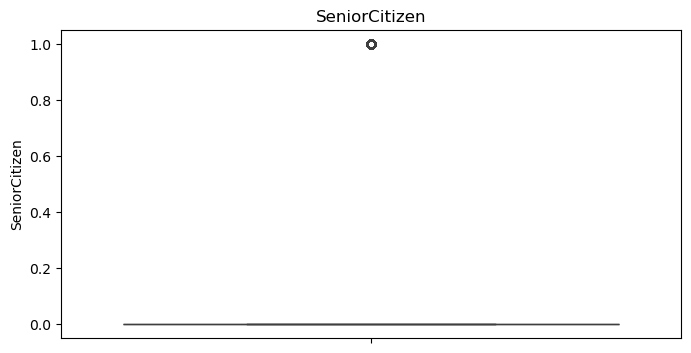

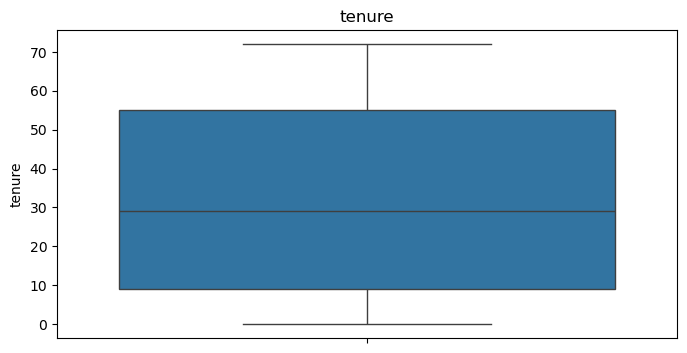

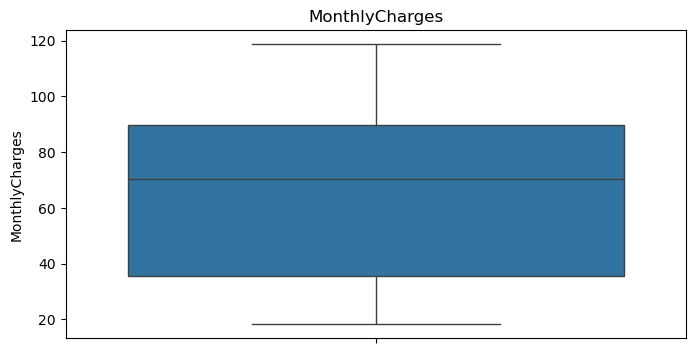

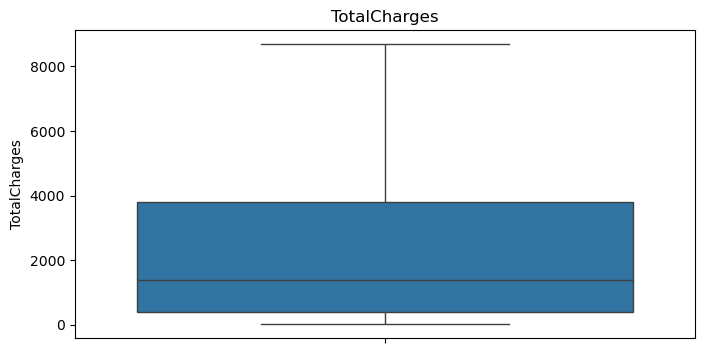

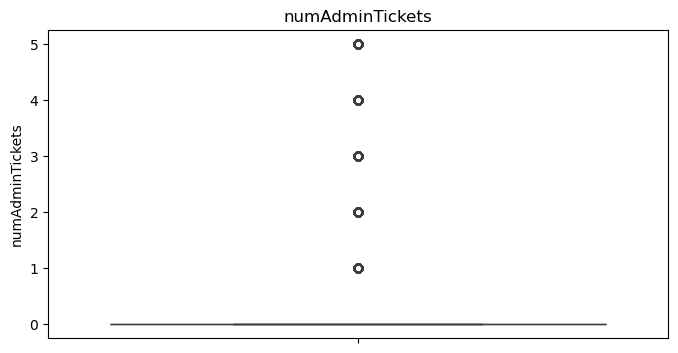

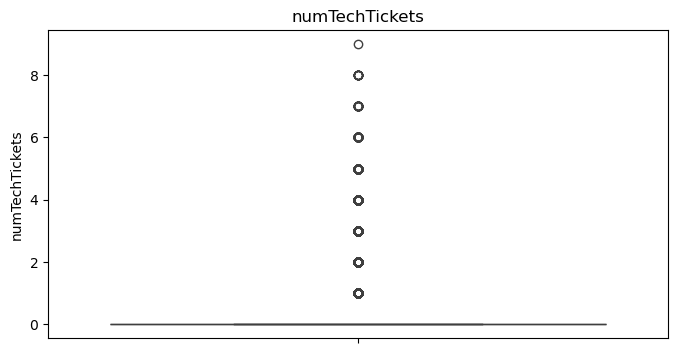

In [19]:
# Visualize numerical feature distributions using box plots to guide outlier handling.


for col in df_num.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df_num[col])
    plt.title(col)
    plt.show()

In [20]:
# Outlier clipping using the Interquartile Range (IQR) method (1.5 * IQR rule).

for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    df_num[col].clip(lower=lower, upper=upper) # Apply clipping (Capping and Flooring)

### 3. Feature Encoding

In [21]:
# One Hot Encoding on features with more than 2 categories

df_multi = ['Contract', 'PaymentMethod', 'InternetService']
# Apply One-Hot Encoding to nominal features.
df_cat = pd.get_dummies(df_cat, columns=df_multi, drop_first=True, dtype='int')



# Label Encoding for binary features

df_bin = [col for col in df_cat.columns if col not in df_multi]
# Apply Label Encoding (0 or 1) to binary categorical features
for col in df_bin:
    le =LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [22]:
 # Combine the processed numerical and categorical dataframes into the final dataset 'df'.

df = pd.concat([df_num, df_cat], axis=1)

### 4. Exploratory Data Analysis (EDA)

##### 4.1. Correlation and Distribution Analysis

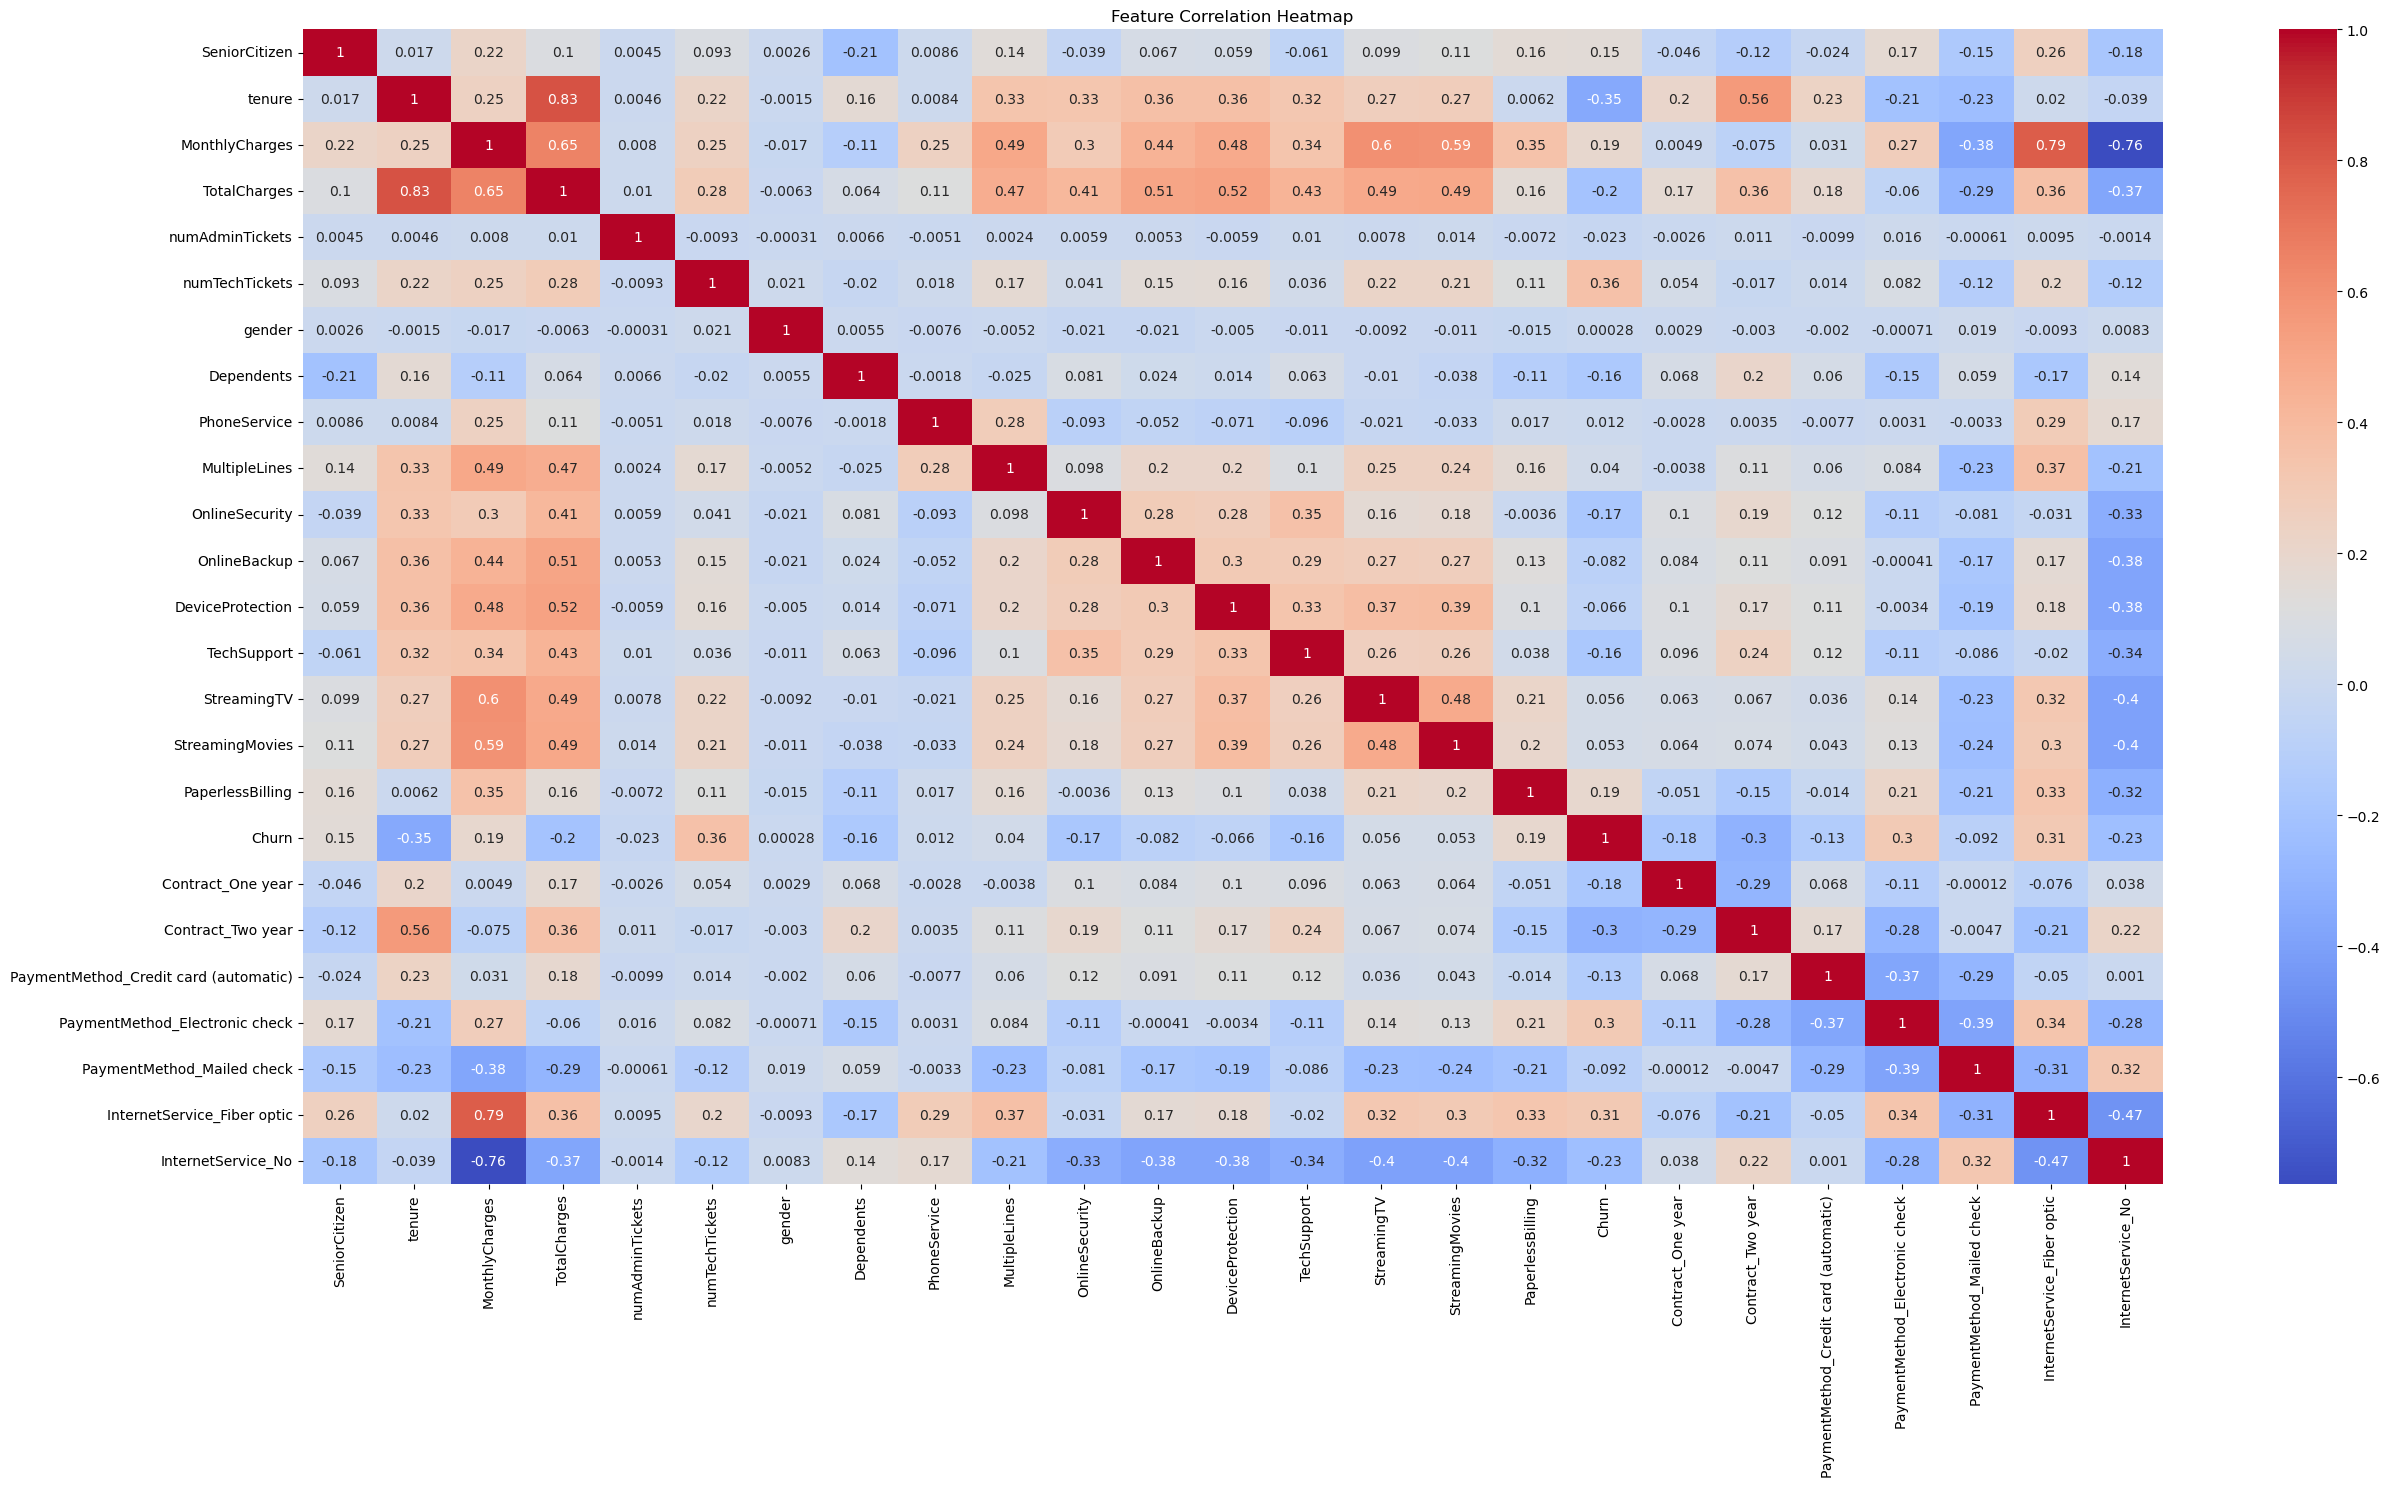

In [23]:
# Visualize the correlation matrix of all processed features.

plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

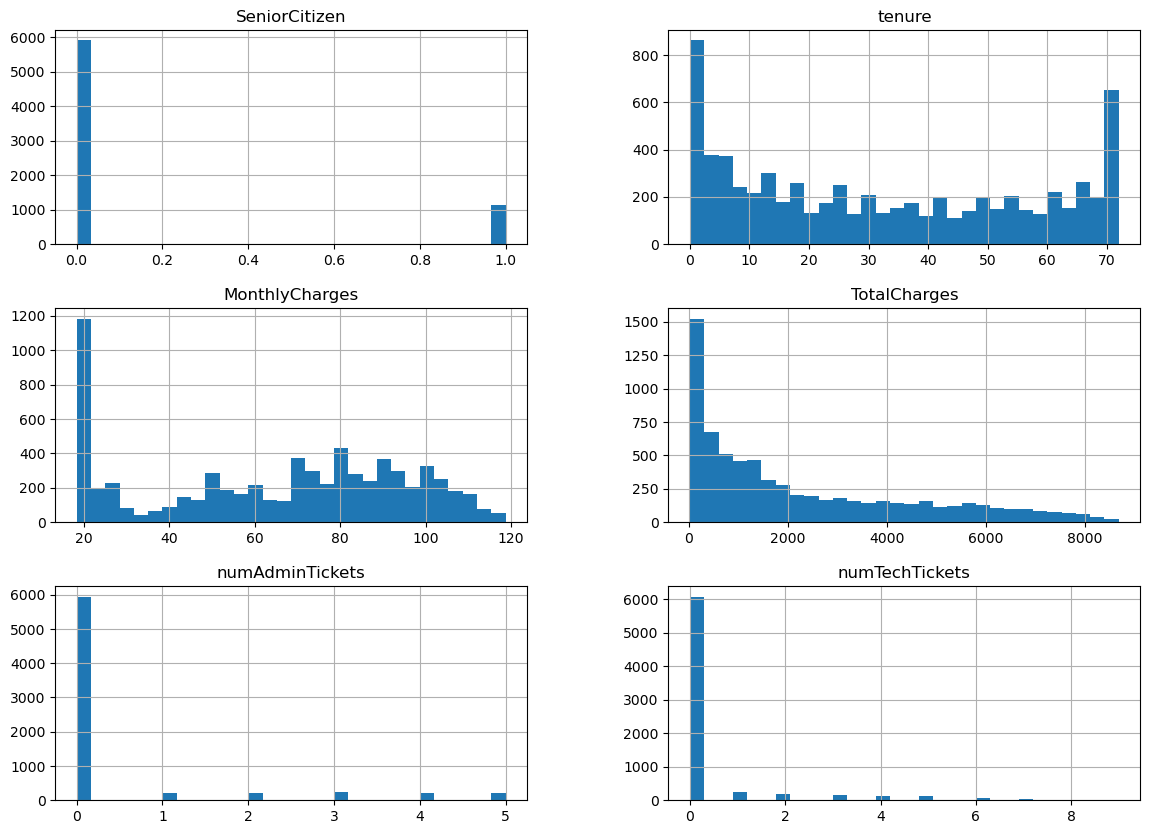

In [24]:
# Plot histograms of numerical features to re-assess distribution and skewness

df[df_num.columns].hist(figsize=(14, 10), bins=30)
plt.show()

- NOTE: TotalCharges, tenure, and MonthlyCharges are still skewed, justifying the use of StandardScaler later.

##### 4.2. Churn Analysis

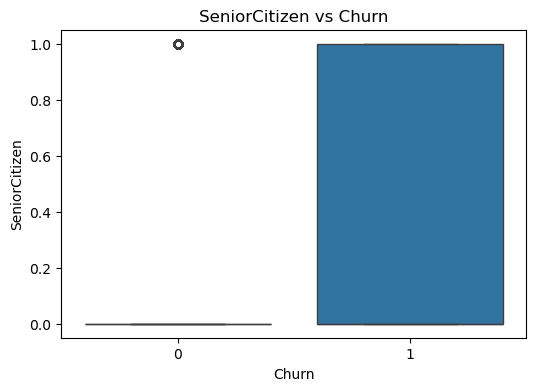

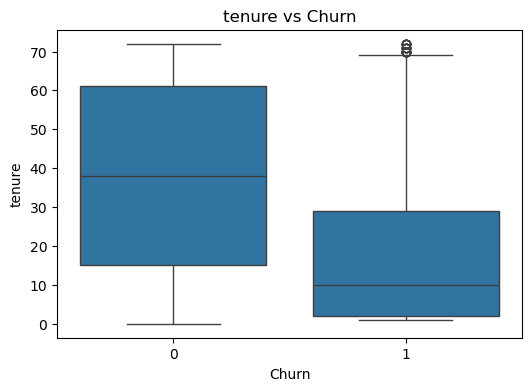

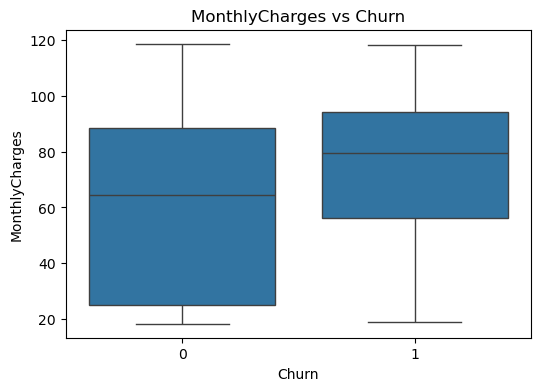

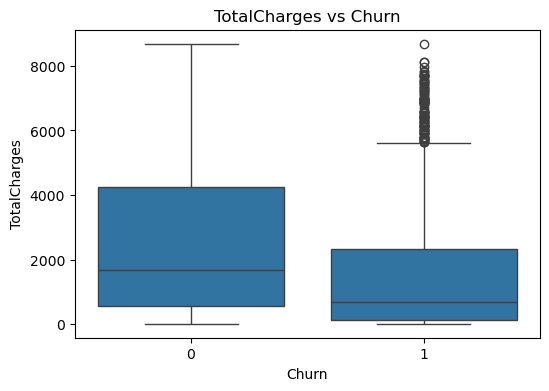

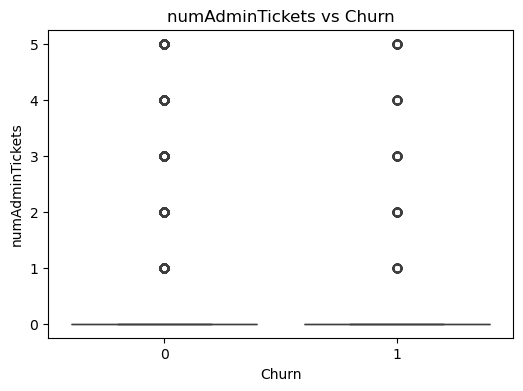

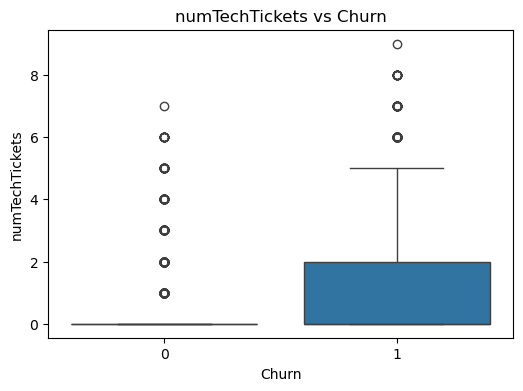

In [25]:
# Box plots comparing numerical feature distributions against the 'Churn' target.


for col in df_num.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

##### INSIGHTS (Numerical Predictors)
- 'numAdminTickets' is a weak predictor of Churn.
- The most powerful numerical predictors are: Low Tenure, Low TotalCharges, High MonthlyCharges, and Senior Citizen Status.

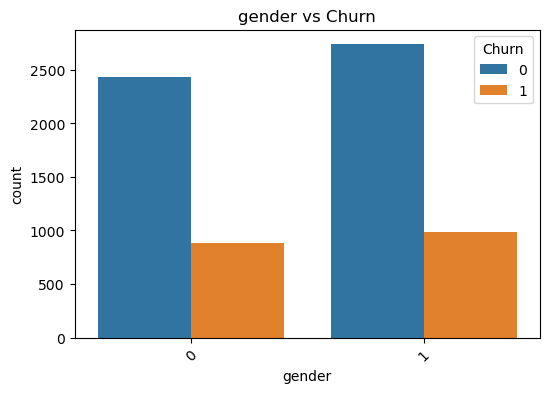

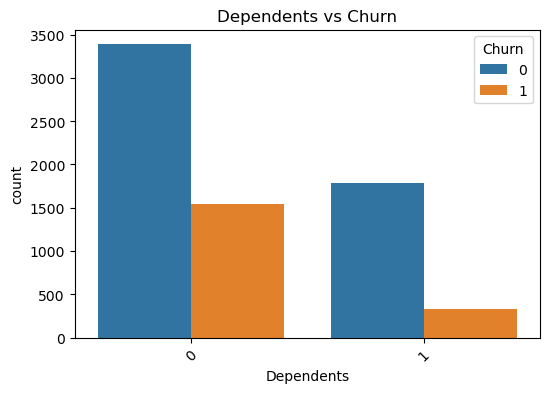

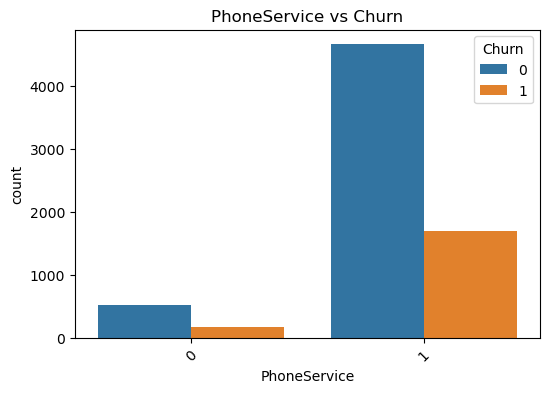

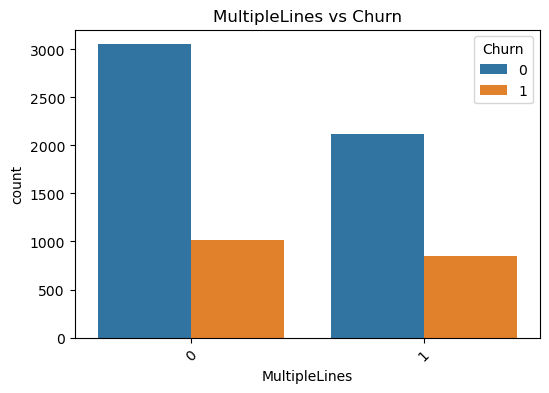

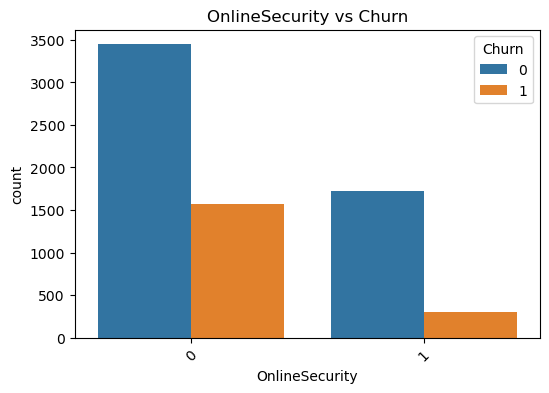

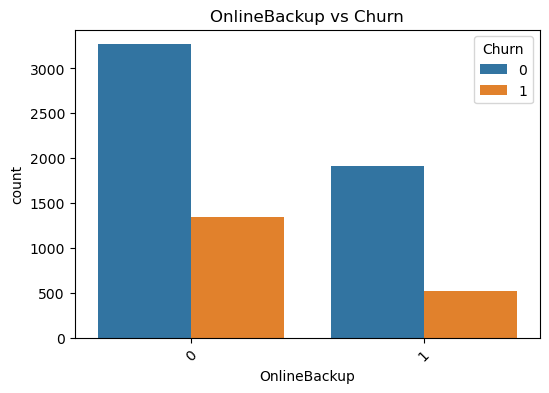

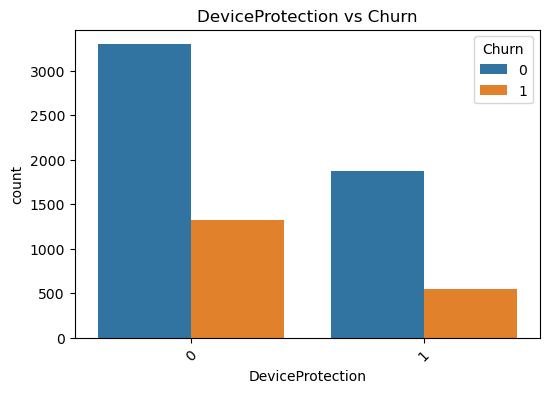

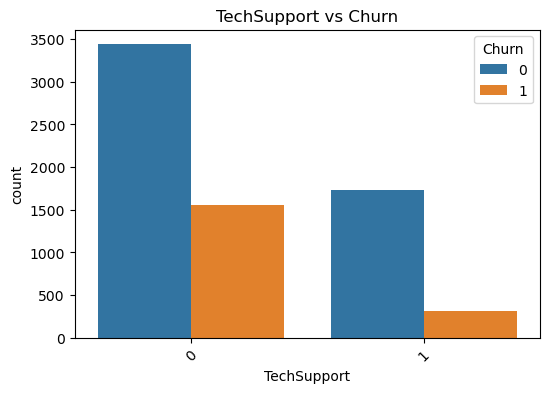

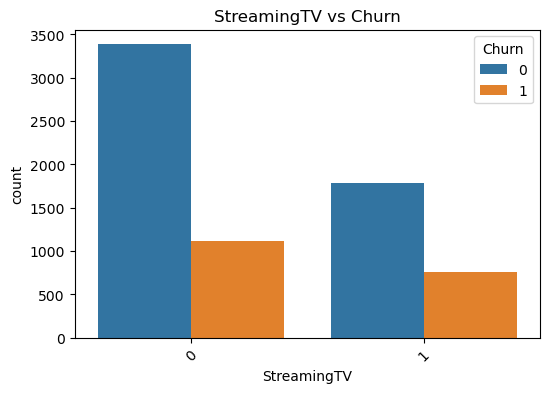

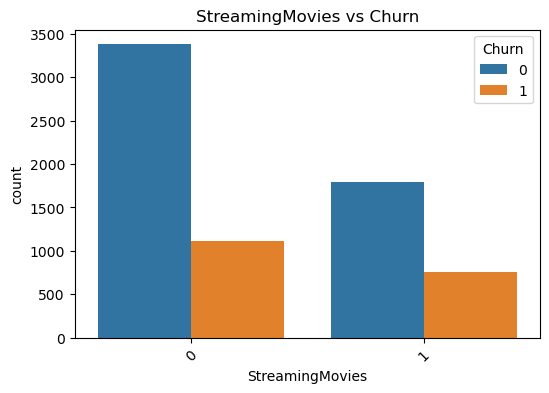

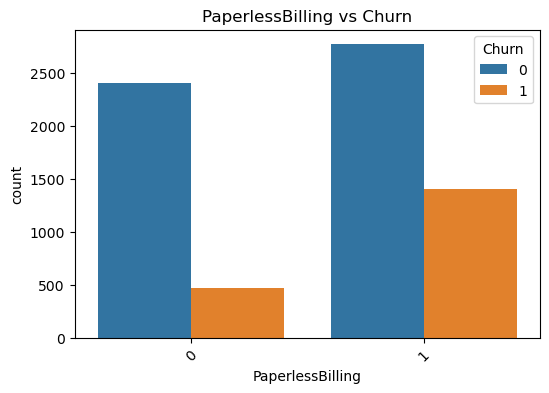

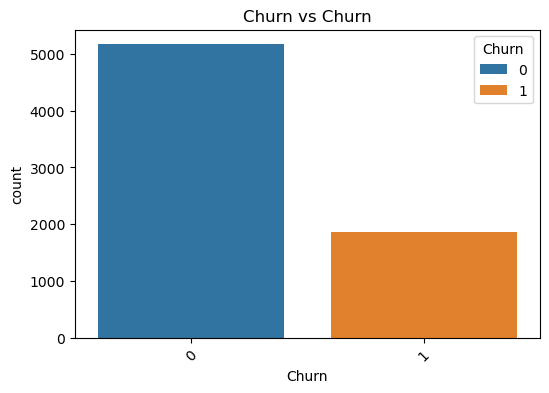

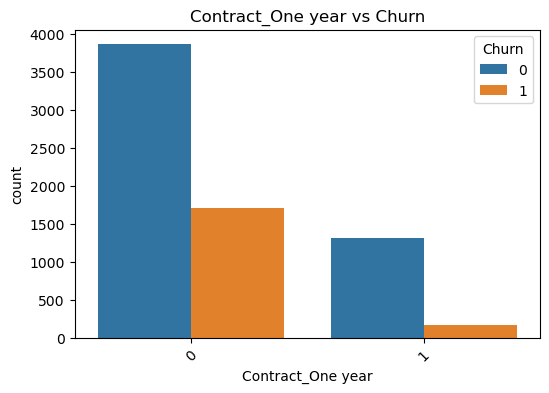

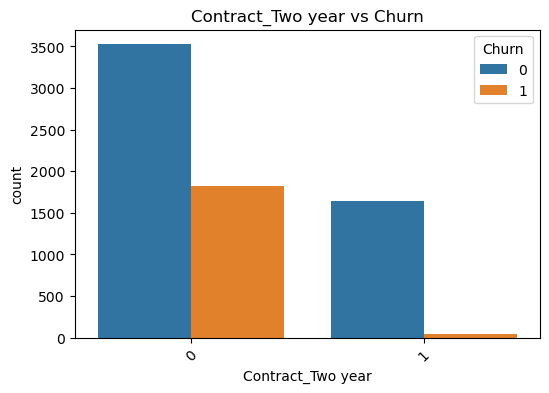

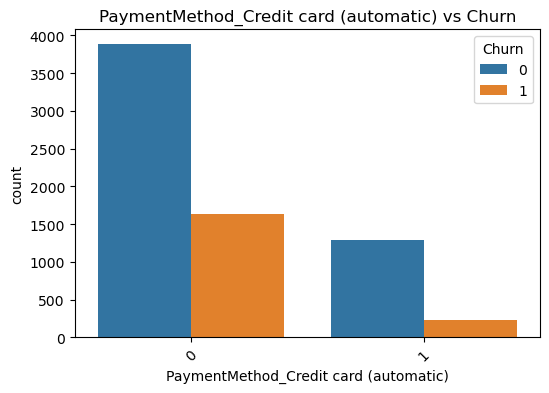

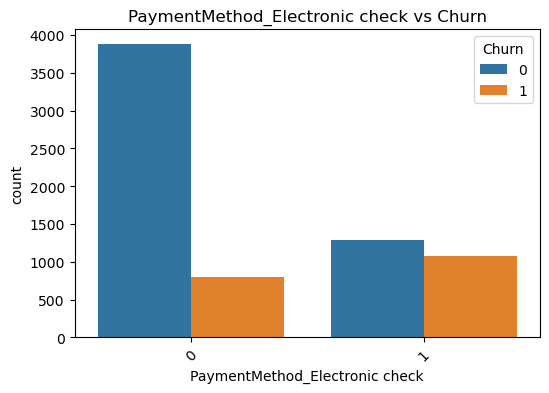

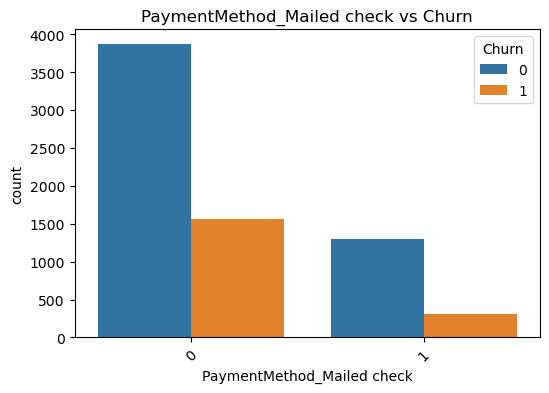

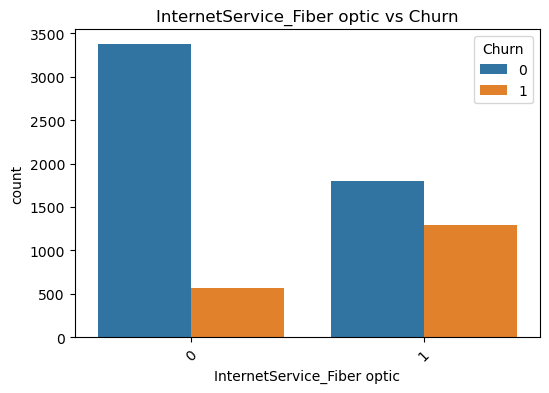

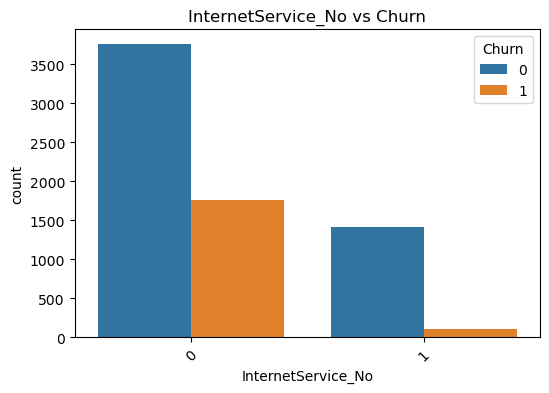

In [26]:
# Count plots comparing categorical feature counts against the 'Churn' target.

for col in df_cat.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

##### INSIGHTS (Categorical Predictors)
- Strong predictors of churn: Short-term Contracts, Electronic Check payment, Fiber optic internet, No security/support services, No Dependents, and Paperless Billing.
- Not predictive (dropped): Gender, PhoneService, MultipleLines, StreamingTV, StreamingMovies.

### 5. Model Preparation and Scaling

In [27]:
# --- Feature Selection ---

# X = df.drop('Churn', axis=1)

# Drop non-predictive features identified during EDA.
X = df.drop(['numAdminTickets', 'gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'Churn'], axis=1)
y = df['Churn'] # Target variable

In [28]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numTechTickets,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,0,2,53.85,108.15,0,0,1,1,0,0,1,0,0,0,0,1,0,0
3,0,45,42.30,1840.75,3,0,1,0,1,1,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [29]:
# --- Standard Scaling ---
# Apply StandardScaler to standardize features (mean=0, std=1). Essential for distance-based and linear models.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# --- Train-Test Split ---
# Split data into 80% training and 20% testing sets for model validation. random_state=42 ensures reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42)

### 6. Model Training and Evaluation

In [31]:
# Initialize the classification models with chosen hyperparameters.

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=10),
    'SVM': SVC(kernel='linear', C=1, gamma='scale')
}


results = {}

# Fit models and evaluate performance on the test set.
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate models using key classification metrics.
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 score': f1_score(y_test, y_pred)
    }

    
# F1 score balances Precision and Recall, making it the primary metric.

In [32]:
# Display results

results_df = pd.DataFrame(results)
print(results_df.T)

                     Accuracy  Precision    Recall  F1 score
Logistic Regression  0.865153   0.753463  0.729223  0.741144
KNN                  0.832505   0.699708  0.643432  0.670391
Decision Tree        0.839603   0.693931  0.705094  0.699468
SVM                  0.865862   0.755556  0.729223  0.742156


In [33]:
# Select the best model based on the highest F1 Score.

best_model = results_df.T['F1 score'].idxmax()
print(f"\n✅ Best Model: {best_model}")


✅ Best Model: SVM


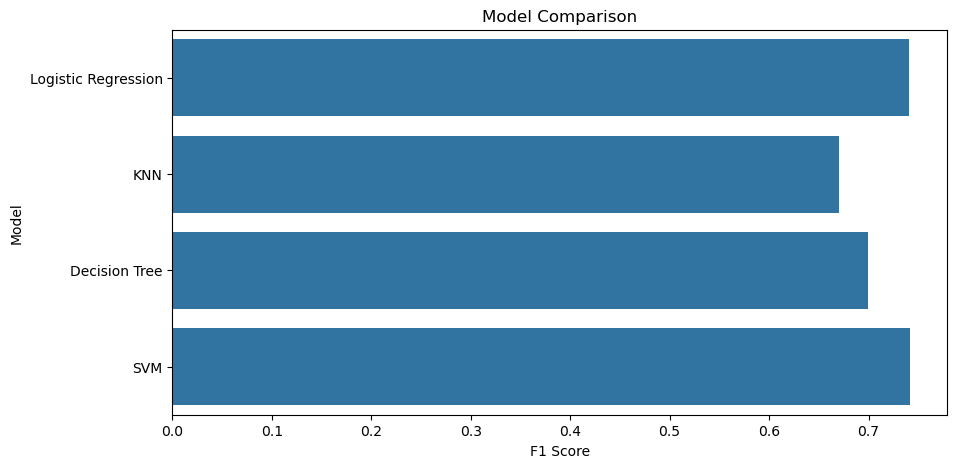

In [34]:
# Visualize model comparison

f1_scores = results_df.loc['F1 score'] 
plt.figure(figsize=(10, 5))
sns.barplot(x=f1_scores.values, y=f1_scores.index)
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()

**Summary**
---
The project successfully benchmarked four models against the highly relevant **F1 Score** metric:

- Best Model: **Support Vector Machine (SVM)**
    - F1 Score: $0.7422$
    - Accuracy: $0.8659$
- **Insight**:
    - The SVM model offers the best trade-off, correctly identifying high-risk customers about **$74\%$** of the time with an accuracy of **$86.6\%$** while maintaining a balanced rate of false positives and false negatives.
    - This high performance suggests that the data cleaning, feature selection, and scaling steps were effective.